In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file
df = pd.read_csv("Resources/bridge_testing_dataset.csv",low_memory=False)
df2 = df.dropna()

In [3]:
# Selecting NY and CA states
df2 = df2.loc[(df2['STATE_CODE_001'] == 36) | (df2['STATE_CODE_001'] == 6),:]
df2.head()

,OBJECTID,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,FEATURES_DESC_006A,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,MIN_NAV_CLR_MT_116,FED_AGENCY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,DATE,bridge_age,future_adt_estimation
39357,39358,6,1,1,road,99.99,1.0,3,1,4,...,8,37258,0.0,Y,F,5,20669.04,723,16,25.0
39358,39359,6,7,0,river,99.99,0.0,3,9,1,...,2,156,0.0,Y,P,3,270.80,1202,89,16.0
39359,39360,6,6,6,road,99.99,0.0,3,9,2,...,5,250,0.0,Y,P,4,178.88,723,75,19.0
39360,39361,6,8,0,road,99.99,0.0,3,19,2,...,N,100,0.0,Y,F,6,650.56,723,39,22.0
39361,39362,6,6,6,canal,99.99,0.0,3,9,2,...,5,250,0.0,Y,F,5,435.66,723,64,18.0


### Balancing BRIDGE_CONDITION data (not necessary)  

In [4]:
# # class count
# class_count_G, class_count_F, class_count_P = df2['BRIDGE_CONDITION'].value_counts()

# # Separate class
# class_G = df2[df2['BRIDGE_CONDITION'] == 'G']
# class_F = df2[df2['BRIDGE_CONDITION'] == 'F']
# class_P = df2[df2['BRIDGE_CONDITION'] == 'P']  
# print('class G:', class_G.shape)
# print('class F:', class_F.shape)
# print('class P:', class_P.shape)

# # Random Under-Sampling
# class_G_under = class_G.sample(class_count_P)
# class_F_under = class_F.sample(class_count_P)

# df2 = pd.concat([class_G_under,class_F_under, class_P], axis=0)

# print("total class of G,F and P:",df2['BRIDGE_CONDITION'].value_counts())# plot the count after under-sampeling
# df2['BRIDGE_CONDITION'].value_counts().plot(kind='bar', rot =0, title='count (target)')

In [4]:
# Select columns of object data type
object_columns = df2.select_dtypes(include=['object']).columns

# Drop object data type columns
df2_filtered = df2.drop(object_columns, axis=1)
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43391 entries, 39357 to 368536
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 43391 non-null  int64  
 1   STATE_CODE_001           43391 non-null  int64  
 2   ROUTE_PREFIX_005B        43391 non-null  int64  
 3   SERVICE_LEVEL_005C       43391 non-null  int64  
 4   MIN_VERT_CLR_010         43391 non-null  float64
 5   BASE_HWY_NETWORK_012     43391 non-null  float64
 6   TOLL_020                 43391 non-null  int64  
 7   FUNCTIONAL_CLASS_026     43391 non-null  int64  
 8   TRAFFIC_LANES_ON_028A    43391 non-null  int64  
 9   TRAFFIC_LANES_UND_028B   43391 non-null  int64  
 10  ADT_029                  43391 non-null  int64  
 11  APPR_WIDTH_MT_032        43391 non-null  float64
 12  DEGREES_SKEW_034         43391 non-null  int64  
 13  STRUCTURE_FLARED_035     43391 non-null  int64  
 14  NAV_VERT_CLR_MT_039   

In [5]:
# Calculate correlation matrix
# calculate the correlation matrix of the features
corr_matrix = df2_filtered.corr()

# set the threshold for correlation value
corr_threshold = 0.77

# find the highly correlated features and drop them from the dataframe
high_corr_features = np.where(corr_matrix.abs() > corr_threshold)
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
df2_filtered.drop([col[1] for col in high_corr_features], axis=1, inplace=True)

# select the remaining features with low correlation
low_corr_features = df2_filtered.columns.tolist()

# print the low correlated features
print(low_corr_features)

['OBJECTID', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020', 'FUNCTIONAL_CLASS_026', 'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B', 'DEGREES_SKEW_034', 'STRUCTURE_FLARED_035', 'NAV_VERT_CLR_MT_039', 'NAV_HORR_CLR_MT_040', 'STRUCTURE_TYPE_043B', 'MAIN_UNIT_SPANS_045', 'APPR_SPANS_046', 'HORR_CLR_MT_047', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 'VERT_CLR_UND_054B', 'OPERATING_RATING_064', 'APPR_ROAD_EVAL_072', 'IMP_LEN_MT_076', 'DATE_OF_INSPECT_090', 'INSPECT_FREQ_MONTHS_091', 'BRIDGE_IMP_COST_094', 'STRAHNET_HIGHWAY_100', 'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', 'NATIONAL_NETWORK_110', 'PIER_PROTECTION_111', 'MIN_NAV_CLR_MT_116', 'LOWEST_RATING', 'DATE', 'bridge_age', 'future_adt_estimation']


In [6]:
df3_filtered = df2_filtered[low_corr_features]

In [8]:
# Selecting the more important features
df3_filtered = df2[['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C',
       'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020',
       'FUNCTIONAL_CLASS_026', 
       'TRAFFIC_LANES_ON_028A','TRAFFIC_LANES_UND_028B', 
       # 'ADT_029', 
       'APPR_WIDTH_MT_032',
       'DEGREES_SKEW_034', #'STRUCTURE_FLARED_035', 
       #'NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040', 
       'STRUCTURE_TYPE_043B', #'MAIN_UNIT_SPANS_045',
       'APPR_SPANS_046', 
       'HORR_CLR_MT_047', 
       'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
       'VERT_CLR_OVER_MT_053','VERT_CLR_UND_054B', 'OPERATING_RATING_064', 
       #'APPR_ROAD_EVAL_072',
       #'IMP_LEN_MT_076', 
       #'DATE_OF_INSPECT_090', 
       #'INSPECT_FREQ_MONTHS_091',
       #'BRIDGE_IMP_COST_094', #'ROADWAY_IMP_COST_095', 
       #'STRAHNET_HIGHWAY_100',
       'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', #'NATIONAL_NETWORK_110',
       # 'PIER_PROTECTION_111', #'MIN_NAV_CLR_MT_116', 
       #'LOWEST_RATING', 
       #'DATE',
       'bridge_age',
       'STRUCTURE_LEN_MT_049',
       # 'FEATURES_DESC_006A', 'DESIGN_LOAD_031',
       'STRUCTURAL_EVAL_067',
       ]]

In [9]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
df3_filtered

,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,APPR_WIDTH_MT_032,DEGREES_SKEW_034,STRUCTURE_TYPE_043B,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,OPERATING_RATING_064,HIGHWAY_SYSTEM_104,PERCENT_ADT_TRUCK_109,bridge_age,STRUCTURE_LEN_MT_049,STRUCTURAL_EVAL_067
39357,1,1,99.99,1.0,3,1,4,0,21.8,0,9,7,8.6,192.0,1093.6,17.2,99.99,0.49,58.1,1,29.0,16,1093.6,7
39358,7,0,99.99,0.0,3,9,1,0,3.7,0,10,3,3.6,39.6,67.7,3.6,99.99,0.00,27.0,0,0.0,89,67.7,3
39359,6,6,99.99,0.0,3,9,2,0,10.0,0,4,0,13.5,10.4,10.4,13.5,99.99,0.00,44.7,0,2.0,75,10.4,4
39360,8,0,99.99,0.0,3,19,2,2,7.2,0,2,0,7.2,18.9,60.8,7.2,99.99,6.40,81.3,0,20.0,39,60.8,7
39361,6,6,99.99,0.0,3,9,2,0,14.6,0,5,0,14.6,6.9,27.4,14.6,99.99,0.00,41.2,0,2.0,64,27.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368532,8,0,99.99,0.0,3,9,2,1,5.5,0,3,0,5.5,10.1,12.6,5.5,99.99,0.00,25.9,0,0.0,27,12.6,5
368533,8,0,99.99,0.0,3,9,1,0,5.1,0,11,0,5.1,23.4,23.4,5.1,99.99,0.00,30.5,0,0.0,116,23.4,4
368534,8,0,99.99,0.0,3,9,1,0,3.6,0,2,0,3.6,5.6,6.5,4.1,99.99,0.00,9.1,0,2.0,54,6.5,3
368535,8,0,4.97,0.0,3,9,2,2,7.3,0,2,0,7.3,16.8,155.1,7.3,4.64,4.59,43.4,0,0.0,27,155.1,6


In [10]:
# Splitting the predictor and features dataset
y=df2['BRIDGE_CONDITION'].ravel()
X=df3_filtered

In [11]:
X.shape

(43391, 24)

In [12]:
# one-hot encoding
X = pd.get_dummies(X)

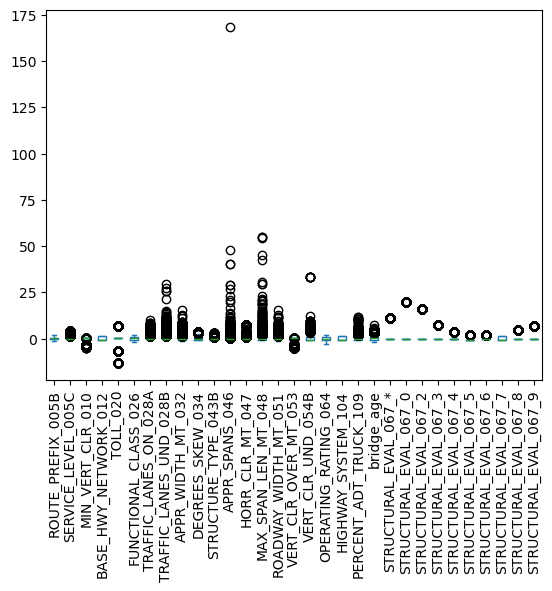

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X)

# Scale the data
X_scaled = pd.DataFrame(X_scaler.transform(X),columns=X.columns)

# Plotting data distributions after scaling
X_scaled.plot(kind='box', showfliers=True, rot=90)
plt.show()

In [15]:
# Define threshold for outliers
threshold = 10

# Create boolean mask for outliers
outlier_mask = abs(X_scaled) > threshold

# Count the number of outliers along each column (axis=0)
outlier_counts = outlier_mask.sum(axis=0)

print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
ROUTE_PREFIX_005B           0
SERVICE_LEVEL_005C          0
MIN_VERT_CLR_010            0
BASE_HWY_NETWORK_012        0
TOLL_020                   96
FUNCTIONAL_CLASS_026        0
TRAFFIC_LANES_ON_028A       1
TRAFFIC_LANES_UND_028B     23
APPR_WIDTH_MT_032           4
DEGREES_SKEW_034            0
STRUCTURE_TYPE_043B         0
APPR_SPANS_046             17
HORR_CLR_MT_047             0
MAX_SPAN_LEN_MT_048        35
STRUCTURE_LEN_MT_049       60
ROADWAY_WIDTH_MT_051        6
VERT_CLR_OVER_MT_053        0
VERT_CLR_UND_054B           8
OPERATING_RATING_064        0
HIGHWAY_SYSTEM_104          0
PERCENT_ADT_TRUCK_109       8
bridge_age                  0
STRUCTURE_LEN_MT_049       60
STRUCTURAL_EVAL_067_*     340
STRUCTURAL_EVAL_067_0     113
STRUCTURAL_EVAL_067_2     171
STRUCTURAL_EVAL_067_3       0
STRUCTURAL_EVAL_067_4       0
STRUCTURAL_EVAL_067_5       0
STRUCTURAL_EVAL_067_6       0
STRUCTURAL_EVAL_067_7       0
STRUCTURAL_EVAL_067_8       0
STRUC

In [16]:
# Filter out rows containing outliers
mask = X_scaled[abs((X_scaled))> threshold].any(axis=1)
X_scaled_clean= X_scaled[~mask]
y_clean = y[~mask]

# number of row eliminated in the original dataset
print('number of row eliminated in the original dataset')
len(X_scaled) - len(X_scaled_clean)

number of row eliminated in the original dataset


801

## LogisticRegression model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming X is your features DataFrame and y is your target variable
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled_clean, y_clean, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           F       0.83      0.80      0.81     17694
           G       0.79      0.83      0.81     14486
           P       0.62      0.60      0.61      2532

    accuracy                           0.80     34712
   macro avg       0.75      0.74      0.75     34712
weighted avg       0.80      0.80      0.80     34712


Classification Report for Testing Data:
              precision    recall  f1-score   support

           F       0.82      0.80      0.81      4327
           G       0.80      0.83      0.81      3715
           P       0.64      0.59      0.62       637

    accuracy                           0.80      8679
   macro avg       0.75      0.74      0.75      8679
weighted avg       0.80      0.80      0.80      8679



## Multi-layer Perceptron classifier model

In [18]:
from sklearn.neural_network import MLPClassifier

# Create a pipeline with StandardScaler and MLPClassifier
pipeline = Pipeline([
    ('model', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                            alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                            max_iter=1000, shuffle=True, random_state=None, tol=0.0001,validation_fraction=0.2))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           F       0.87      0.86      0.86     17694
           G       0.83      0.89      0.86     14486
           P       0.86      0.62      0.72      2532

    accuracy                           0.85     34712
   macro avg       0.86      0.79      0.81     34712
weighted avg       0.85      0.85      0.85     34712


Classification Report for Testing Data:
              precision    recall  f1-score   support

           F       0.81      0.81      0.81      4327
           G       0.80      0.83      0.81      3715
           P       0.77      0.57      0.66       637

    accuracy                           0.80      8679
   macro avg       0.79      0.74      0.76      8679
weighted avg       0.80      0.80      0.80      8679



# BRIDGE 9340

In [78]:
bridge_2007 = pd.read_csv("Resources/2007_allStates.csv",encoding='latin-1')
bridge_2007.shape

C:\Users\nigro\AppData\Local\Temp\ipykernel_19248\199982946.py:1: DtypeWarning: Columns (1,2,5,7,11,17,35,36,37,38,39,41,42,44,59,61,63,66,67,68,69,70,75,76,77,79,80,84,85,86,87,88,90,96,98,102,106,107,108,109,111,112,113,114,116,117,119,120,121,123,124,130,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  bridge_2007 = pd.read_csv("Resources/2007_allStates.csv",encoding='latin-1')


(715434, 134)

In [79]:
# Selecting states
bridge_MI_df = bridge_2007.loc[(bridge_2007['STATE_CODE_001'] == 27) | (bridge_2007['STATE_CODE_001'] == 6) | (bridge_2007['STATE_CODE_001'] == 36) ,:].reset_index(drop=True)
bridge_MI_df.fillna(0, inplace=True)

In [102]:
bridge_MI_df['STRUCTURE_NUMBER_008'] = bridge_MI_df['STRUCTURE_NUMBER_008'].str.strip()
bridge_9340_idx = bridge_MI_df[bridge_MI_df['STRUCTURE_NUMBER_008']=='9340'].index
bridge_9340_idx = bridge_9340_idx[1]
bridge_9340_idx

74591

In [81]:
# converting YEAR_BUILT_027 column to Bridge age column
year_built = bridge_MI_df['YEAR_BUILT_027']
bridge_age = [2024-year for year in year_built]
bridge_MI_df['bridge_age'] = bridge_age
del bridge_MI_df['YEAR_BUILT_027']

# converting YEAR_OF_IMP_097 column to Bridge age column
year_reconstructed = bridge_MI_df['YEAR_RECONSTRUCTED_106']
new_age = []

# Loop through index-value pairs of the Series
for idx, year_r in year_reconstructed.items():
    if not pd.isna(year_r) and year_r > 1:
        age_r = 2024 - year_r
        index_r = idx
        if age_r > 0 :
            bridge_reconstructed = {'index': index_r, 'bridge_age': age_r}
            new_age.append(bridge_reconstructed)
# Bridge Age replacement
for replacement_data in new_age:
    bridge_MI_df.loc[replacement_data['index'], 'bridge_age'] = replacement_data['bridge_age']

del bridge_MI_df['YEAR_RECONSTRUCTED_106']
bridge_MI_df['bridge_age'].head(10)


0    44.0
1    41.0
2    64.0
3    64.0
4    34.0
5    64.0
6    51.0
7    54.0
8    53.0
9    74.0
Name: bridge_age, dtype: float64

In [90]:
df_features = bridge_MI_df[['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C',
       'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020',
       'FUNCTIONAL_CLASS_026', 
       'TRAFFIC_LANES_ON_028A','TRAFFIC_LANES_UND_028B', 
       # 'ADT_029', 
       'APPR_WIDTH_MT_032',
       'DEGREES_SKEW_034', #'STRUCTURE_FLARED_035', 
       #'NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040', 
       'STRUCTURE_TYPE_043B', #'MAIN_UNIT_SPANS_045',
       'APPR_SPANS_046', 
       'HORR_CLR_MT_047', 
       'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
       'VERT_CLR_OVER_MT_053','VERT_CLR_UND_054B', 'OPERATING_RATING_064', 
       #'APPR_ROAD_EVAL_072',
       #'IMP_LEN_MT_076', 
       #'DATE_OF_INSPECT_090', 
       #'INSPECT_FREQ_MONTHS_091',
       #'BRIDGE_IMP_COST_094', #'ROADWAY_IMP_COST_095', 
       #'STRAHNET_HIGHWAY_100',
       'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', #'NATIONAL_NETWORK_110',
       # 'PIER_PROTECTION_111', #'MIN_NAV_CLR_MT_116', 
       #'LOWEST_RATING', 
       #'DATE',
       'bridge_age',
       'STRUCTURE_LEN_MT_049',
       # 'FEATURES_DESC_006A', 'DESIGN_LOAD_031',
       'STRUCTURAL_EVAL_067',
       ]]

In [91]:
X_9340 =df_features
X_9340['STRUCTURAL_EVAL_067'] = X_9340['STRUCTURAL_EVAL_067'].str.strip()


C:\Users\nigro\AppData\Local\Temp\ipykernel_19248\1787381351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_9340['STRUCTURAL_EVAL_067'] = X_9340['STRUCTURAL_EVAL_067'].str.strip()


In [94]:
X_9340 = df_features
X_9340 = pd.get_dummies(X_9340)
X_9340 = X_9340.dropna()
X_9340

,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,APPR_WIDTH_MT_032,DEGREES_SKEW_034,STRUCTURE_TYPE_043B,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,OPERATING_RATING_064,HIGHWAY_SYSTEM_104,PERCENT_ADT_TRUCK_109,bridge_age,STRUCTURE_LEN_MT_049,STRUCTURAL_EVAL_067_*,STRUCTURAL_EVAL_067_0,STRUCTURAL_EVAL_067_2,STRUCTURAL_EVAL_067_3,STRUCTURAL_EVAL_067_4,STRUCTURAL_EVAL_067_5,STRUCTURAL_EVAL_067_6,STRUCTURAL_EVAL_067_7,STRUCTURAL_EVAL_067_8,STRUCTURAL_EVAL_067_9
0,6.0,6.0,99.99,0.0,3.0,9.0,2.0,0.0,10.0,0.0,4.0,0.0,13.5,10.4,10.4,13.5,99.99,0.00,24.7,0.0,2.0,44.0,10.4,False,False,False,False,False,True,False,False,False,False
1,6.0,6.0,99.99,0.0,3.0,19.0,2.0,2.0,7.2,0.0,2.0,0.0,7.2,18.9,60.8,7.3,99.99,6.42,54.5,0.0,20.0,41.0,60.8,False,False,False,False,False,False,False,True,False,False
2,6.0,6.0,99.99,0.0,3.0,9.0,4.0,0.0,14.6,0.0,5.0,0.0,14.6,6.9,27.4,14.6,99.99,0.00,24.7,0.0,2.0,64.0,27.4,False,False,False,False,False,True,False,False,False,False
3,6.0,6.0,99.99,0.0,3.0,9.0,4.0,0.0,14.6,0.0,5.0,0.0,14.6,6.9,27.4,14.6,99.99,0.00,24.7,0.0,2.0,64.0,27.4,False,False,False,False,False,True,False,False,False,False
4,6.0,6.0,99.99,0.0,3.0,19.0,2.0,0.0,7.0,0.0,7.0,0.0,10.4,4.5,9.8,10.4,99.99,0.00,54.5,0.0,2.0,34.0,9.8,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80428,4.0,0.0,4.21,0.0,3.0,16.0,0.0,2.0,0.0,0.0,2.0,0.0,10.0,13.4,14.3,0.0,0.00,0.00,0.0,0.0,4.0,69.0,14.3,False,False,False,False,False,False,False,False,False,False
80429,3.0,1.0,4.72,0.0,3.0,14.0,0.0,4.0,0.0,0.0,3.0,0.0,8.8,27.1,58.8,0.0,0.00,0.00,0.0,0.0,8.0,27.0,58.8,False,False,False,False,False,False,False,False,False,False
80430,3.0,1.0,5.54,0.0,3.0,12.0,0.0,4.0,0.0,0.0,3.0,0.0,10.6,32.3,34.4,0.0,0.00,0.00,0.0,0.0,5.0,26.0,34.4,False,False,False,False,False,False,False,False,False,False
80431,3.0,1.0,4.47,0.0,3.0,6.0,0.0,2.0,0.0,0.0,2.0,0.0,13.7,20.1,20.1,0.0,0.00,0.00,0.0,0.0,6.0,42.0,20.1,False,False,False,False,False,False,False,False,False,False


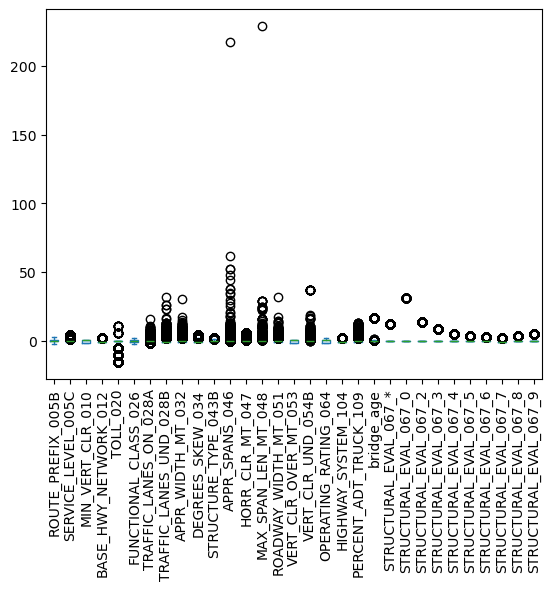

In [95]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_9340)

# Scale the data
X_scaled = pd.DataFrame(X_scaler.transform(X_9340),columns=X_9340.columns)

X_scaled.plot(kind='box', showfliers=True, rot=90)
plt.show()

In [96]:
# Model
final_model = pipeline.steps[-1][1]
final_model

MLPClassifier(max_iter=1000, validation_fraction=0.2)

In [97]:
# Make predictions on the AZ and TX data
y_9340 = pipeline.predict(X_scaled)

# Calculate classification report for training data
y_9340

array(['P', 'G', 'P', ..., 'F', 'G', 'G'], dtype='<U1')

In [104]:
specific_values = y_9340[bridge_9340_idx]
specific_values

'P'